In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
from PIL import Image
import re

In [10]:
df = pd.read_csv(r"D:\1. UoB Data Science\MSc FINAL PROJECT\1 . computer vision task\my project\data\imageclasslist.txt",
                 delim_whitespace=True, names=['Name', 'Class', 'Light', 'In/Out', 'Train/Val/Test'],
                 skiprows=1)
df.head()

C:\Users\ibado\AppData\Local\Temp\ipykernel_33828\479867895.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r"D:\1. UoB Data Science\MSc FINAL PROJECT\1 . computer vision task\my project\data\imageclasslist.txt",


,Name,Class,Light,In/Out,Train/Val/Test
0,2015_00001.png,1,2,1,1
1,2015_00002.png,1,6,2,1
2,2015_00003.png,1,5,2,1
3,2015_00004.jpg,1,3,2,1
4,2015_00005.jpg,1,6,2,1


In [3]:
df.columns

Index(['Name', 'Class', 'Light', 'In/Out', 'Train/Val/Test'], dtype='object')

In [4]:
class_map={1:"Bicycle", 2:"Boat", 3:"Bottle",4:"Bus",5:"Car",6:"Chair",7:"Cup",8:"Dog",9:"Motorbike",10:"Person"}
light_map = {1:'Low', 2:"Ambient", 3:"Object",4:"Single", 5:"Weak",6:"Strong",7:"Screen", 8:"Window", 9:"Shadow",10:"Twilight"}
inout_map = {1:"Indoor", 2:"Outdoor"}
set_map = {1:"Train", 2:"Validation", 3:"Test"}

In [5]:
df["Class"] = df["Class"].map(class_map)
df["Light"] = df["Light"].map(light_map)
df["In/Out"] = df["In/Out"].map(inout_map)
df["Train/Val/Test"] = df["Train/Val/Test"].map(set_map)
df.head()

,Name,Class,Light,In/Out,Train/Val/Test
0,2015_00001.png,Bicycle,Ambient,Indoor,Train
1,2015_00002.png,Bicycle,Strong,Outdoor,Train
2,2015_00003.png,Bicycle,Weak,Outdoor,Train
3,2015_00004.jpg,Bicycle,Object,Outdoor,Train
4,2015_00005.jpg,Bicycle,Strong,Outdoor,Train


In [11]:
df.isna().sum()

Name              0
Class             0
Light             0
In/Out            0
Train/Val/Test    0
dtype: int64

In [7]:
duplicates = df[df.duplicated(subset=['Name'], keep=False)]
print("Number of duplicate image names:",len(duplicates))

Number of duplicate image names: 0


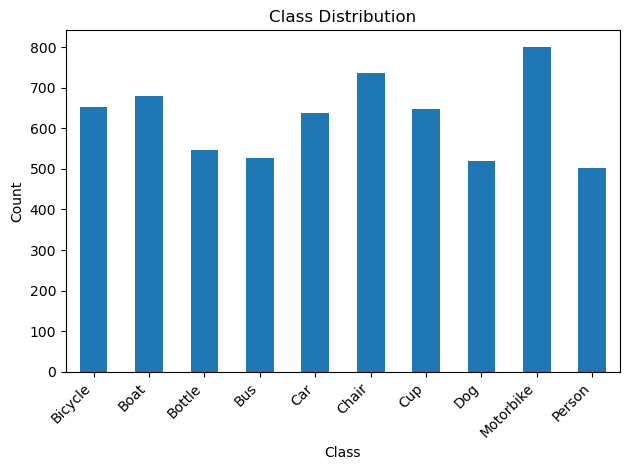

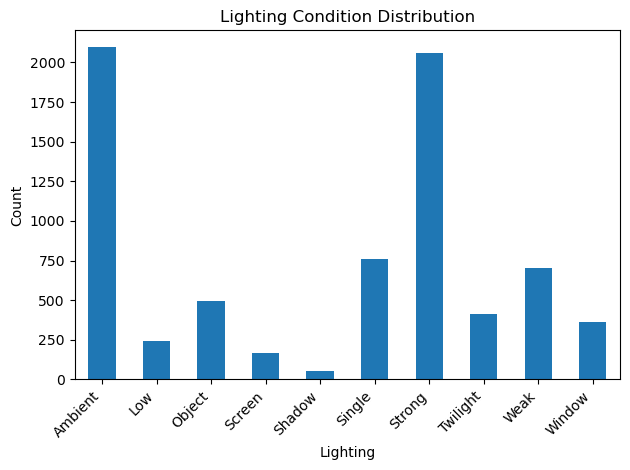

Class imbalance ratio (max/min): 1.59


In [ ]:
# Class distribution
cls_counts = df["Class"].value_counts().sort_index()
plt.figure()
cls_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Lighting distribution
light_counts = df["Light"].value_counts().sort_index()
plt.figure()
light_counts.plot(kind="bar")
plt.title("Lighting Condition Distribution")
plt.xlabel("Lighting")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Imbalance ratio
imbalance_ratio = cls_counts.max() / max(1, cls_counts.min())
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.2f}")


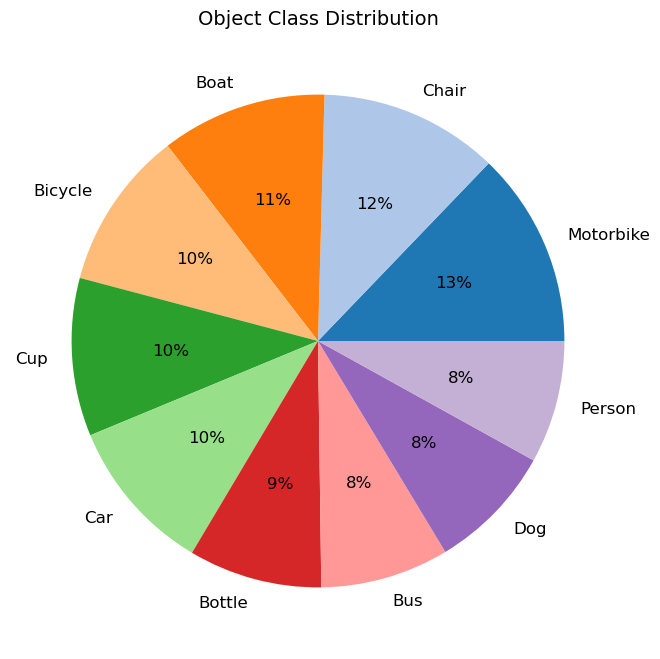

In [ ]:
# Count class frequencies
class_counts = df["Class"].value_counts()
colors = plt.cm.tab20.colors[:len(class_counts)]
plt.figure(figsize=(8,8))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.0f%%',
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title("Object Class Distribution", fontsize=14)
plt.show()


### Cross-tabs 

In [44]:
# Class × Split
ct_class_split = pd.crosstab(df["Class"], df["Train/Val/Test"])
print(ct_class_split)

# Lighting × Split
ct_light_split = pd.crosstab(df["Light"], df["Train/Val/Test"])
print(ct_light_split)


Train/Val/Test  Test  Train  Validation
Class                                  
Bicycle          252    250         150
Boat             279    250         150
Bottle           147    250         150
Bus              127    250         150
Car              238    250         150
Chair            335    250         150
Cup              248    250         150
Dog              119    250         150
Motorbike        401    250         150
Person           103    250         150
Train/Val/Test  Test  Train  Validation
Light                                  
Ambient          925    716         457
Low              134     51          56
Object           144    235         119
Screen            28     69          68
Shadow            14     28          14
Single           255    316         191
Strong           538    999         522
Twilight         174    147          95
Weak             232    298         175
Window           119    141         103


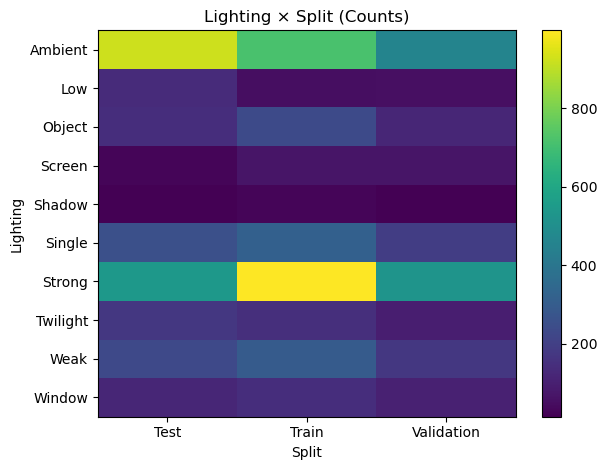

In [ ]:
plt.figure()
plt.imshow(ct_light_split.values, aspect="auto")
plt.title("Lighting × Split (Counts)")
plt.xlabel("Split")
plt.ylabel("Lighting")
plt.xticks(ticks=range(ct_light_split.shape[1]), labels=ct_light_split.columns)
plt.yticks(ticks=range(ct_light_split.shape[0]), labels=ct_light_split.index)
plt.colorbar()
plt.tight_layout()
plt.show()

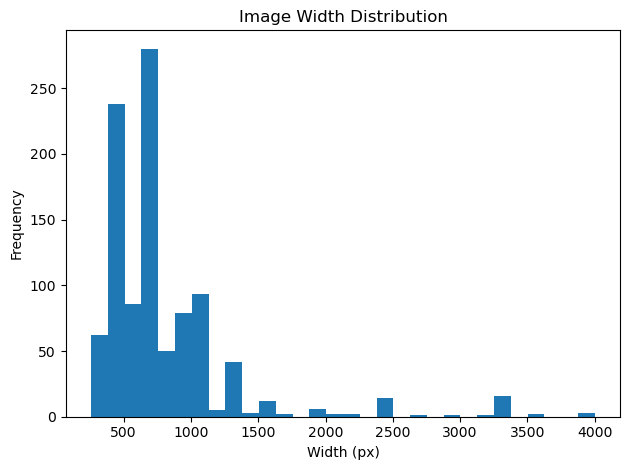

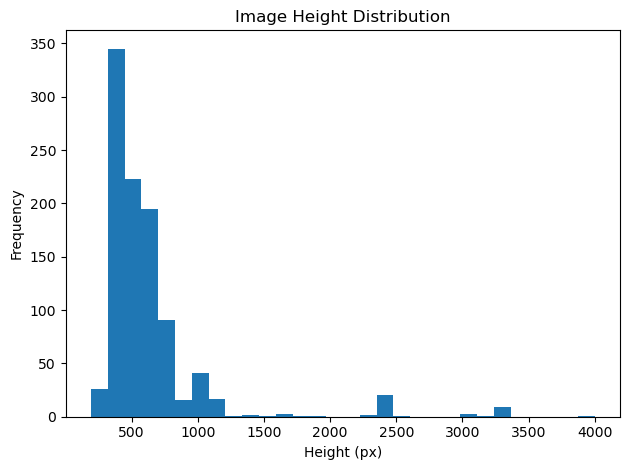

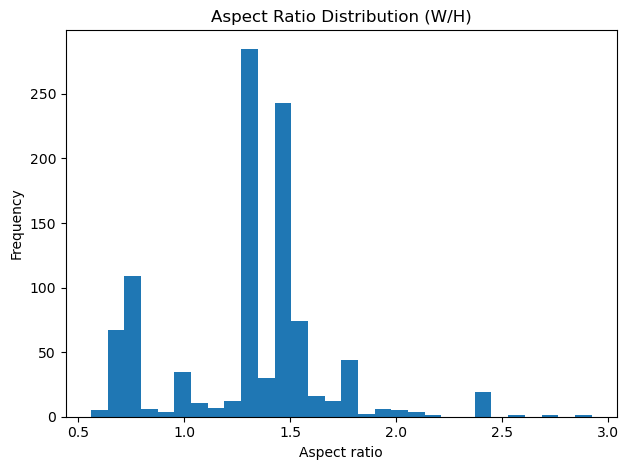

{'n_sampled': 1000,
 'width_mean': 797.335,
 'width_std': 532.5116406449937,
 'height_mean': 636.876,
 'height_std': 472.2180751882909,
 'aspect_mean': 1.3201109439287864,
 'aspect_std': 0.36545757631246856}

In [ ]:
images_dir = Path(r"D:\1. UoB Data Science\MSc FINAL PROJECT\1 . computer vision task\my project\data\Exdark")
df = df.copy() 

# Standardize column names we’ll use
if "filename" in df.columns:
    df["fname"] = df["filename"]
elif "Name" in df.columns:
    df["fname"] = df["Name"]
else:
    raise KeyError("Couldn't find a filename column ('filename' or 'Name') in df.")
# Map numeric class IDs to folder names if needed
class_map = {
    1:"Bicycle", 2:"Boat", 3:"Bottle", 4:"Bus", 5:"Car", 6:"Cat",
    7:"Chair", 8:"Cup", 9:"Dog", 10:"Motorbike", 11:"Person", 12:"Table"
}

if "class" in df.columns:
    df["class_text"] = df["class"]
elif "Class" in df.columns:
    df["class_text"] = df["Class"].map(class_map)
elif "class_id" in df.columns:
    df["class_text"] = df["class_id"].map(class_map)
else:
    # If no class info is present, leave as NA and we’ll fallback to search.
    df["class_text"] = pd.NA

# Helper: build a robust full path for each row
def resolve_image_path(row):
    name = str(row["fname"])
    # 1) If df already includes subdir in the name, try direct
    p_direct = images_dir / name
    if p_direct.is_file():
        return p_direct

    # 2) If we have a class_text, try class subfolder
    cls = row.get("class_text")
    if isinstance(cls, str) and len(cls):
        p_class = images_dir / cls / name
        if p_class.is_file():
            return p_class

    # 3) Fallback: search all immediate subfolders for the file
    for sub in images_dir.iterdir():
        if sub.is_dir():
            cand = sub / name
            if cand.is_file():
                return cand

    return None 

# Sample to keep it fast
sample_df = df.sample(min(1000, len(df)), random_state=42).copy()

# Collect widths/heights
widths, heights = [], []
paths = []
for _, row in sample_df.iterrows():
    p = resolve_image_path(row)
    paths.append(p)
    if p is None:
        widths.append(None); heights.append(None)
        continue
    try:
        with Image.open(p) as im:
            w, h = im.size
    except Exception:
        w, h = (None, None)
    widths.append(w); heights.append(h)

sample_df["img_path"] = paths
sample_df["width"] = widths
sample_df["height"] = heights
sample_df = sample_df.dropna(subset=["width","height"])

# Aspect ratio
sample_df["aspect"] = sample_df["width"] / sample_df["height"]

plt.figure()
sample_df["width"].plot(kind="hist", bins=30)
plt.title("Image Width Distribution")
plt.xlabel("Width (px)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
sample_df["height"].plot(kind="hist", bins=30)
plt.title("Image Height Distribution")
plt.xlabel("Height (px)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
sample_df["aspect"].plot(kind="hist", bins=30)
plt.title("Aspect Ratio Distribution (W/H)")
plt.xlabel("Aspect ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optional: print a quick summary you can quote
summary = {
    "n_sampled": len(sample_df),
    "width_mean": float(sample_df["width"].mean()),
    "width_std": float(sample_df["width"].std()),
    "height_mean": float(sample_df["height"].mean()),
    "height_std": float(sample_df["height"].std()),
    "aspect_mean": float(sample_df["aspect"].mean()),
    "aspect_std": float(sample_df["aspect"].std()),
}
summary

In [ ]:
from pathlib import Path
import re
import pandas as pd
import matplotlib.pyplot as plt

ANNO_ROOT = Path(r"D:\1. UoB Data Science\MSc FINAL PROJECT\1 . computer vision task\my project\data\ExDark_Annno\ExDark_Annno")
META_FILE = Path(r"D:\1. UoB Data Science\MSc FINAL PROJECT\1 . computer vision task\my project\data\imageclasslist.txt")  # path to your meta file (keep if you've uploaded it here)
OUT_DIR   = Path(r"D:\1. UoB Data Science\MSc FINAL PROJECT\1 . computer vision task\my project\data\eda_instances")       # outputs saved here
OUT_DIR.mkdir(exist_ok=True, parents=True)

# -----------------------
# 1) Helpers
# -----------------------
def count_instances_in_txt(txt_path: Path) -> int:
    """Count non-empty, non-comment lines as instances, format-agnostic."""
    try:
        lines = txt_path.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return 0
    cnt = 0
    for ln in lines:
        s = ln.strip()
        if not s:
            continue
        # Treat any non-empty line as one bbox/instance
        cnt += 1
    return cnt

def save_bar(series, title, xlab, ylab, filename):
    plt.figure()
    series.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(filename, dpi=200)
    plt.close()

# -----------------------
# 2) Walk annotation tree: class -> *.txt
# -----------------------
if not ANNO_ROOT.exists():
    raise FileNotFoundError(f"Annotation root not found: {ANNO_ROOT}. Please set ANNO_ROOT correctly.")

class_counts = {}
per_file_records = []  # (class, stem, ann_file, instances)

for class_dir in sorted([p for p in ANNO_ROOT.iterdir() if p.is_dir()]):
    cls_name = class_dir.name
    total_for_class = 0
    for txt in class_dir.glob("*.txt"):
        n = count_instances_in_txt(txt)
        total_for_class += n
        per_file_records.append((cls_name, txt.stem, txt.name, n))
    class_counts[cls_name] = total_for_class

obj_df = pd.DataFrame(list(class_counts.items()), columns=["class", "instances"]).sort_values("instances", ascending=False)
per_file_df = pd.DataFrame(per_file_records, columns=["class", "stem", "ann_file", "instances"])

# -----------------------
# 3) Object-level imbalance ratio
# -----------------------
if len(obj_df) and obj_df["instances"].min() > 0:
    imbalance_ratio_obj = obj_df["instances"].max() / obj_df["instances"].min()
else:
    imbalance_ratio_obj = float("nan")

print(f"Object-level imbalance ratio (max/min): {imbalance_ratio_obj:.3f}")
display(obj_df)

# Save tables
obj_df.to_csv(OUT_DIR/"object_instances_by_class.csv", index=False)
per_file_df.to_csv(OUT_DIR/"object_instances_per_file.csv", index=False)

# Plot and save distribution
save_bar(
    obj_df.set_index("class")["instances"],
    "Object Instance Distribution by Class",
    "Class", "Instance Count",
    OUT_DIR/"plot_object_instance_distribution.png"
)

# -----------------------
# 4) Class × Lighting (instance-weighted)
# -----------------------
if META_FILE.exists():
    raw = META_FILE.read_text(encoding="utf-8", errors="ignore").strip().splitlines()
    records = []
    for i, line in enumerate(raw):
        line = line.strip()
        if not line:
            continue
        # skip header-like lines
        if i == 0 and ("Name" in line and "Class" in line):
            continue
        parts = re.split(r"\s+", line)
        if len(parts) < 5:
            continue
        fname, cls_id, light_id, io_id, split_id = parts[:5]
        stem = re.sub(r"\.[A-Za-z0-9]+$", "", fname)  # remove extension
        records.append((fname, stem, int(cls_id), int(light_id), int(io_id), int(split_id)))

    meta_df = pd.DataFrame(records, columns=["filename","stem","class_id","light_id","io_id","split_id"])

    # Map IDs to human-readable labels (as per your explanation file)
    light_map = {
        1:"Low", 2:"Ambient", 3:"Object", 4:"Single", 5:"Weak",
        6:"Strong", 7:"Screen", 8:"Window", 9:"Shadow", 10:"Twilight"
    }
    meta_df["light"] = meta_df["light_id"].map(light_map)

    # Merge per-file instance counts with metadata by stem
    merged = per_file_df.merge(meta_df[["stem","light"]], on="stem", how="left")
    merged["light"] = merged["light"].fillna("Unknown")

    # Sum instances to a Class × Lighting table
    ct = merged.pivot_table(index="class", columns="light", values="instances", aggfunc="sum", fill_value=0)
    ct = ct.reindex(sorted(ct.index), axis=0)
    ct = ct.reindex(sorted(ct.columns), axis=1)

    display(ct.head())
    ct.to_csv(OUT_DIR/"instances_class_by_light.csv")

    # Simple heatmap-like plot
    import numpy as np
    plt.figure()
    plt.imshow(ct.values, aspect="auto")
    plt.title("Instances: Class × Lighting")
    plt.xlabel("Lighting")
    plt.ylabel("Class")
    plt.xticks(ticks=range(ct.shape[1]), labels=ct.columns, rotation=45, ha="right")
    plt.yticks(ticks=range(ct.shape[0]), labels=ct.index)
    plt.colorbar()
    plt.tight_layout()
    plt.savefig(OUT_DIR/"plot_instances_class_by_light.png", dpi=200)
    plt.close()
else:
    print(f"Meta file not found: {META_FILE} — skipping Class × Lighting table.")

print("\nSaved outputs to:", OUT_DIR)


Object-level imbalance ratio (max/min): 1.793


,class,instances
2,Bottle,3229
0,Bicycle,3026
11,Table,2959
9,Motorbike,2951
10,People,2853
3,Bus,2618
6,Chair,2497
1,Boat,2444
4,Car,2384
8,Dog,2373


light,Unknown
class,
Bicycle,3026
Boat,2444
Bottle,3229
Bus,2618
Car,2384



Saved outputs to: D:\1. UoB Data Science\MSc FINAL PROJECT\1 . computer vision task\my project\data\eda_instances


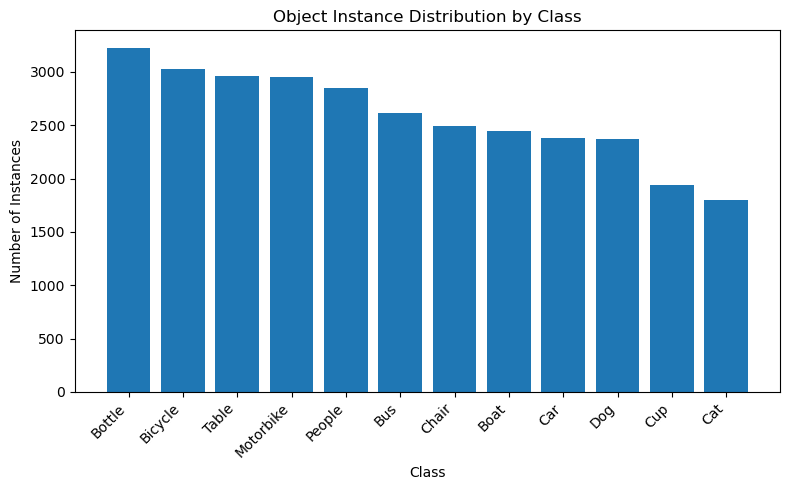

In [ ]:

# Load your CSV
df = pd.read_csv(r"D:\1. UoB Data Science\MSc FINAL PROJECT\1 . computer vision task\my project\data\eda_instances\object_instances_by_class.csv")

# sort by count to make imbalance clearer
df = df.sort_values("instances", ascending=False)

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(df["class"], df["instances"])
plt.title("Object Instance Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
